In [110]:
import pydotplus
from sklearn import tree
from IPython.display import Image
import pandas as pd
from sklearn.metrics import accuracy_score
from subprocess import call
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.externals.six import StringIO  

In [111]:
# Read the original CSV files using Pandas
match = pd.read_csv("data/data/decision.csv")
match.head()


,Outlook,Temperature,Humidity,Wind,PlayCricket
0,1,10,100,1,0
1,1,10,100,0,0
2,3,10,100,1,1
3,2,20,100,1,1
4,2,30,200,1,1


In [122]:
X = match.drop('PlayCricket', axis=1)  
y = match['PlayCricket']  

In [123]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)  


In [124]:
from sklearn.tree import DecisionTreeClassifier  
classifier = DecisionTreeClassifier()  
classifier.fit(X_train, y_train)  

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [125]:
y_pred = classifier.predict(X_test)  

In [126]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  

[[2 0]
 [1 2]]
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.67      0.80         3

   micro avg       0.80      0.80      0.80         5
   macro avg       0.83      0.83      0.80         5
weighted avg       0.87      0.80      0.80         5



In [127]:
prediction= classifier.predict([[3,10,200,1]])
print(prediction)
print(accuracy_score(y_test,y_pred)*100)

[1]
80.0


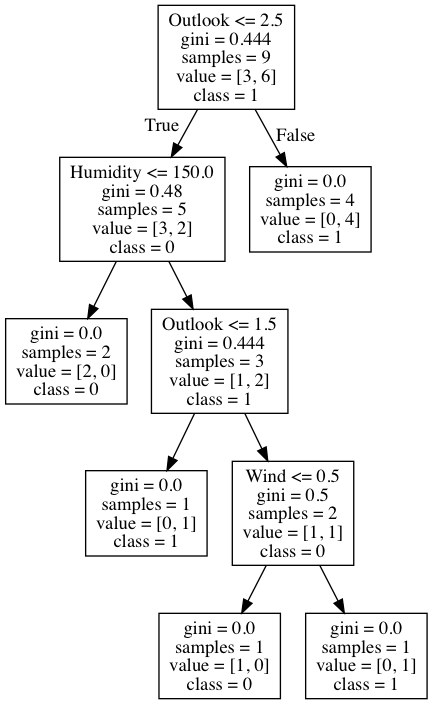

In [128]:
dot_data = tree.export_graphviz(classifier, out_file=None, 
                                feature_names=['Outlook','Temperture','Humidity','Wind'],  
                                class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())